In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
face_df = pd.read_csv("/content/drive/MyDrive/facial-keypoints-detection/training/training.csv")

In [ ]:
face_df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [ ]:
len(face_df.columns)

31

In [ ]:
import seaborn as sns

<Axes: >

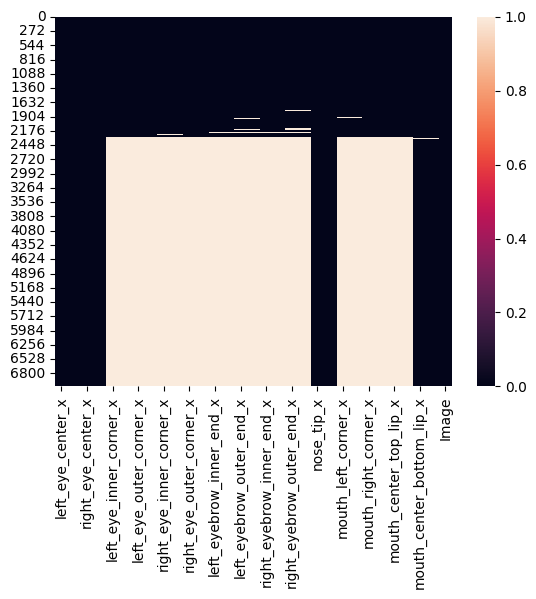

In [ ]:
sns.heatmap(face_df.isnull())

In [ ]:
face_df.dropna(inplace=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout

In [ ]:
def str_to_img(str):
  list1=list(map(int,str.split()))
  conv_img=np.array(list1).reshape(96,96,1)
  return conv_img

In [ ]:
face_df["Image"]=face_df['Image'].apply(str_to_img)
X=np.stack(face_df['Image'].values)
y=face_df.drop("Image",axis=1).values
print(X.shape)
print(y.shape)

(2140, 96, 96, 1)
(2140, 30)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
input_dim = X_train.shape[1]
input_dim

96

In [ ]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

model.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - loss: 1644.6892 - mae: 34.9546 - val_loss: 2204.7102 - val_mae: 43.5849
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 33s 214ms/step - loss: 107.8440 - mae: 8.5310 - val_loss: 1535.6431 - val_mae: 36.4890
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - loss: 53.9971 - mae: 5.8651 - val_loss: 873.8174 - val_mae: 27.0063
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 46.4632 - mae: 5.3856 - val_loss: 317.9609 - val_mae: 16.3639
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - loss: 32.4502 - mae: 4.4849 - val_loss: 209.1849 - val_mae: 12.9025
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 30.4664 - mae: 4.3757 - val_loss: 158.6951 - val_mae: 11.3224
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 26.9092 - mae: 4.0851 - val_loss: 113.5104 - val_mae: 9.2956
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - loss: 25.5362 - mae: 3.9767 - val_loss: 106.5062 - val_mae: 9.1193
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 8.5688 - mae: 2.3143
Test Loss: 8.5801
Test MAE: 2.3093


In [ ]:
X_test

array([[[[183],
         [185],
         [185],
         ...,
         [179],
         [209],
         [232]],

        [[186],
         [188],
         [185],
         ...,
         [173],
         [207],
         [233]],

        [[184],
         [187],
         [186],
         ...,
         [175],
         [210],
         [233]],

        ...,

        [[ 15],
         [ 15],
         [ 12],
         ...,
         [ 15],
         [ 17],
         [ 16]],

        [[ 14],
         [ 17],
         [ 14],
         ...,
         [ 13],
         [ 16],
         [ 18]],

        [[ 18],
         [ 16],
         [ 13],
         ...,
         [ 14],
         [ 15],
         [ 15]]],


       [[[ 55],
         [ 57],
         [ 59],
         ...,
         [236],
         [233],
         [235]],

        [[ 53],
         [ 55],
         [ 59],
         ...,
         [232],
         [235],
         [229]],

        [[ 60],
         [ 60],
         [ 60],
         ...,
         [234],
         [

In [ ]:
from PIL import Image
import numpy as np

def convert_image_to_grayscale_array(input_path, new_size):

    with Image.open(input_path) as img:

        grayscale_img = img.convert('L')

        resized_img = grayscale_img.resize(new_size)

        img_array = np.array(resized_img)

        img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], 1))
        return img_array

input_image_path = '/content/drive/MyDrive/ex1.jpg'
new_size = (96,96)

grayscale_array = convert_image_to_grayscale_array(input_image_path, new_size)
print(grayscale_array)

[[[[213]
   [213]
   [213]
   ...
   [214]
   [214]
   [213]]

  [[213]
   [213]
   [213]
   ...
   [214]
   [214]
   [213]]

  [[214]
   [214]
   [214]
   ...
   [214]
   [214]
   [214]]

  ...

  [[213]
   [214]
   [213]
   ...
   [192]
   [195]
   [195]]

  [[213]
   [214]
   [213]
   ...
   [ 71]
   [ 28]
   [ 19]]

  [[213]
   [213]
   [213]
   ...
   [ 60]
   [  5]
   [  0]]]]


In [ ]:
model.predict(grayscale_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[60.03218 , 35.74245 , 30.684101, 36.51382 , 54.949722, 36.49112 ,
        64.99325 , 36.597805, 35.284023, 36.879093, 24.987452, 37.03961 ,
        50.38342 , 29.849585, 70.457115, 30.320778, 38.13178 , 30.71822 ,
        19.23861 , 30.519121, 43.81476 , 51.14686 , 56.76658 , 69.98083 ,
        34.564842, 70.405174, 45.53166 , 65.39962 , 45.04328 , 73.71414 ]],
      dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
one = face_df["Image"][133]

In [ ]:
img_array = np.array(one)
img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], 1))

In [ ]:
prediction = model.predict(img_me)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
img_me = convert_image_to_grayscale_array("/content/drive/MyDrive/ex1.jpg",(96,96))

In [ ]:
img1 = convert_image_to_grayscale_array("/content/drive/MyDrive/HARSHA INTER PHOTO",new_size)

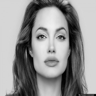

In [ ]:
array = np.squeeze(img_me)
image = Image.fromarray(array.astype(np.uint8))
image


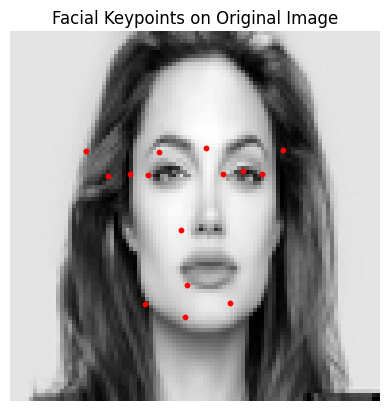

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

points = prediction

points = points.reshape(-1, 2)

plt.imshow(image, cmap='gray')

plt.scatter(points[:, 0], points[:, 1], color='red', s=10)

plt.title('Facial Keypoints on Original Image')
plt.axis('off')
plt.show()
